# Implementación de modelos de ML con Scikit Learn

Scikit-Learn es el módulo para ML más conocido y utlizado en Python. Su principal atractivo es una interfaz limpia, uniforme y simple, que facilita la exploración y permite la integración con otros paquetes, como Pandas.

Además, posee una completa [documentación en línea](https://scikit-learn.org/0.21/documentation.html). En esta parte del curso, nos centraremos en su esquema para representar datos y su interfaz para usar modelos.

**Esquema de datos similar a pandas**

* Datos son representados por una matriz de features y un vector objetivo
* Las características de los ejemplos se almacenan en una matriz de features (X), de tamaño [n_samples, n_features] (esta matriz puede ser un `DataFrame`)
* El vector objetivo (y) contiene el valor a predecir para cada ejemplo y tiene tamaño [n_samples, 1] (este vector puede ser una `Series`)

**Interfaz para usar modelos**

* La interfaz de scikit-learn se basa en los siguientes conceptos principales:
    * Consistente: todos los modelos comparten una interfaz con unas pocas funciones
    * Sucinta: solo usa clases propias para los algoritmos. Para todo el resto utiliza formatos estándares (datos en DataFrame por ejemplo)
    * Útil: los parámetros por defecto son útiles para estimar afectuadamente los modelos
* En resumen, requiere muy poco esfuerzo utilizarla y obtener resultados rápidamente.

**En la práctica...**
* En general, un caso de uso típico en scikit-learn es como el siguiente:
    * Elegir el modelo adecuado, importando la clase correspondiente desde sklearn
    * Obtener o generar matriz `X` y vector `y`
    * Entrenar el modelo llamando al `fit(X, y)`
    * Aplicar el modelo al set de test, usando el método `predict(X)` (o `transform(X)` en algunos casos)
* Al igual que para los datos, se requiere muy poco esfuerzo para obtener resultados rápidamente.

## Partición de datos - Conjuntos de entrenamiento y test

Ahora vamos a `sklearn` para importar metricas y dividir los datos. Recordemos que sklearn nos entrega facilmente una forma de dividir. Revisar la documentacion del modulo [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split).

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
# Para ver la documentación del método, descomentar la siguiente línea
train_test_split?

In [3]:
import numpy as np
import pandas as pd


X = pd.DataFrame(np.random.rand(100, 5))
X_train, X_test = train_test_split(X, train_size=0.7)

In [4]:
print(X_train)
print(X_test)


           0         1         2         3         4
92  0.372596  0.772251  0.801978  0.112539  0.753866
61  0.408452  0.219009  0.898319  0.645731  0.590790
76  0.958549  0.875217  0.409972  0.760925  0.665533
43  0.606171  0.173473  0.578500  0.660958  0.227833
8   0.831781  0.811575  0.421189  0.506199  0.979620
..       ...       ...       ...       ...       ...
16  0.349568  0.793283  0.101209  0.103711  0.074422
96  0.623390  0.849490  0.026884  0.563060  0.243302
87  0.444389  0.764208  0.999675  0.083103  0.859361
21  0.398302  0.915058  0.126401  0.983685  0.819270
28  0.299926  0.119297  0.199602  0.435823  0.842685

[70 rows x 5 columns]
           0         1         2         3         4
74  0.027279  0.078158  0.458913  0.924100  0.912489
0   0.255672  0.306075  0.709195  0.327623  0.883833
10  0.780813  0.621774  0.807638  0.541730  0.169353
93  0.146285  0.457901  0.927589  0.263397  0.667539
37  0.587541  0.930342  0.680168  0.125039  0.051661
54  0.413284  0.919550 

In [5]:
import numpy as np


X = np.arange(100)

# 80 | 10 | 10
# Primero tomamos el 80% de entrenamiento y dejamos aparte el resto
X_train, X_unseen = train_test_split(X, train_size=0.8, test_size=0.2)
# Lo que dejamos aparte antes, ahora lo dividimos en dos partes iguales
X_test, X_valid = train_test_split(X_unseen, train_size=0.5, test_size=0.5)
# Esto nos da nuestra partición aleatoria 80-10-10
X_train.shape, X_test.shape, X_valid.shape

((80,), (10,), (10,))

In [6]:
print(X_train)
print(X_test)
print(X_valid)

[ 6 60 87 91  1 50 61 75 43  4 18 71 36 58 44 37 40 77 11  2 99 41 93 68
 57 38  8 96 17 52  0 49 16 25  3 76  5 94 69 32 39 46 70 67 73 74  9 78
 86 90 27 26 64 24 35 80 22 20 54 55 95 81 34 92 21 14 65 56 85 29 13 63
 88 84 48 72 59 31 47 10]
[15 62 28 23 97 66 12 79 45 42]
[83 30 98 19 53 51 82  7 33 89]


In [7]:
X = np.random.rand(100, 5)
y = np.random.randint(1, high=4 + 1, size=(100,))
data = pd.DataFrame(X)
# X_train, X_test = train_test_split(X, train_size=0.7)
data["y"] = y
data

,0,1,2,3,4,y
0,0.618834,0.514751,0.191943,0.457655,0.169314,2
1,0.153784,0.473876,0.734658,0.373341,0.473100,4
2,0.980775,0.813556,0.632092,0.158997,0.693784,1
3,0.855649,0.037264,0.813356,0.645868,0.789208,3
4,0.331005,0.963206,0.532075,0.974652,0.021038,2
...,...,...,...,...,...,...
95,0.684841,0.829504,0.155163,0.708091,0.955670,2
96,0.195972,0.456401,0.361363,0.123214,0.839869,3
97,0.335573,0.014271,0.244139,0.557584,0.811588,2
98,0.103958,0.240633,0.733911,0.370225,0.918809,4


In [8]:
y = data["y"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y)

In [9]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           0         1         2         3         4
82  0.769343  0.773662  0.981144  0.941027  0.353769
81  0.504433  0.235097  0.339705  0.394778  0.364731
78  0.586041  0.075314  0.996490  0.489002  0.218070
71  0.933126  0.979476  0.389526  0.871878  0.771536
84  0.488348  0.963398  0.173734  0.880923  0.223715
63  0.633492  0.086368  0.366159  0.533180  0.545992
73  0.618972  0.379607  0.527207  0.136477  0.896406
94  0.912756  0.743568  0.519876  0.852281  0.578670
53  0.361047  0.966545  0.821283  0.298206  0.156756
13  0.999319  0.725607  0.885092  0.866631  0.933134
77  0.410403  0.367408  0.461428  0.246022  0.858576
86  0.151047  0.960695  0.582723  0.558403  0.769463
34  0.819145  0.615724  0.512328  0.281243  0.379929
18  0.042762  0.696805  0.820777  0.158548  0.831261
29  0.040744  0.068577  0.887356  0.230778  0.175830
68  0.776468  0.973019  0.785460  0.091249  0.385282
98  0.103958  0.240633  0.733911  0.370225  0.918809
24  0.392935  0.011138  0.641942  0.827865  0.

In [10]:
# TODO: Mover donde hay datos efectivamente
# Esta vez haremos el split al mismo tiempo en las features y las etiquetas
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

## Reducción de dimensionalidad - Exploración con PCA

Importamos los módulos necesarios para entrenar un modelo y para mostrar resultados:

In [11]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

Cargamos un set de datos similar a MNIST, pero más pequeño, y visualuzamos algunos de sus ejemplos.

In [12]:
from sklearn import datasets


digits = datasets.load_digits()

In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

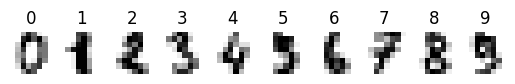

In [14]:
N = 10
for i in range(N):
    image = digits.images[i]
    label = digits.target[i]
    plt.subplot(1, N, i + 1)
    plt.axis("off")
    plt.imshow(image, cmap=colormaps["gray_r"], interpolation="nearest")
    plt.title(label)
plt.show()

Reducimos dimensionalidad utilizando la implementación de [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) en Scikit Learn ([video recomendado: "StatQuest: Principal Component Analysis (PCA), Step-by-Step"](https://www.youtube.com/watch?v=FgakZw6K1QQ)):

In [15]:
pca = PCA(...)

# Opción verbosa
pca = pca.fit(datos)
nuevos_datos = pca.transform(datos)

# Opción corta
# nuevos_datos = pca.fit_transform(datos)

NameError: name 'PCA' is not defined

In [ ]:
from sklearn.decomposition import PCA


# Creamos nuestro objeto PCA y le indicamos cuántas dimensiones retornar
# (notar que se pueden mantener todos los componentes)
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
plt.scatter(
    projected[:, 0],
    projected[:, 1],
    c=digits.target,
    edgecolor="none",
    alpha=0.5,
    cmap=colormaps["nipy_spectral"].resampled(len(set(digits.target))),
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


In [ ]:
from sklearn.decomposition import PCA


# Creamos nuestro objeto PCA y le indicamos cuántas dimensiones retornar
# (notar que se pueden mantener todos los componentes)
pca = PCA(n_components=0.7)
pca.fit_transform(digits.data).shape

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
import numpy as np


x = np.arange(1, len(pca.explained_variance_ratio_) + 1)
y = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
plt.ylim(0.0, 1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=1))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()


## (1) Clasificador de k-vecinos más cercanos

Carguemos un nuevo dataset

In [ ]:
wine = datasets.load_wine()

In [ ]:
wine

In [ ]:
wine.data.shape

Reducimos dimensionalidad

In [ ]:
pca = PCA(n_components=2)
projected = pca.fit_transform(wine.data)

plt.scatter(
    projected[:, 0],
    projected[:, 1],
    c=wine.target,
    edgecolor="none",
    alpha=0.5,
    cmap=colormaps["nipy_spectral"].resampled(len(set(wine.target))),
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


Luego aplicamos split.

In [ ]:
# Esta vez haremos el split al mismo tiempo en las features y las etiquetas
# X_train, X_test, y_train, y_test
train_features, test_features, train_classes, test_classes = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=0
)

A continuación entrenaremos un modelo $k$-NN con $k=1$ y mostraremos el rendimiento.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics


# Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_features, train_classes)

# Usamos el clasificador para predecir sobre los datos de test
predicted = classifier.predict(test_features)

expected = test_classes
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print()
print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))


Probemos varios valores de k para encontrar el mejor:

In [ ]:
K = 10
max_accuracy = 0
best_neighbors = 0
for n_neighbors in range(1, K + 1):
    print(f"Evaluando rendimiento para {n_neighbors} vecinos")
    # Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors).fit(
        train_features, train_classes
    )
    # Usamos el clasificador para predecir sobre los datos de test
    predicted = classifier.predict(test_features)
    accuracy = metrics.balanced_accuracy_score(expected, predicted)
    print(f"K={n_neighbors}: {accuracy:.2f}")
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_neighbors = n_neighbors
print(
    f"El mejor rendimiento se alcanza con {best_neighbors} vecinos "
    f"junto con un accuracy de {max_accuracy}."
)

### Repitiendo análisis sobre "digits" dataset

A continuación, entrenaremos un modelo de *k*-vecinos cercanos con k = 1 y mostraremos el rendimiento:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Definimos y ajustamos nuestro clasificador sobre la mitad de los datos
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(data[n_samples // 2 :], digits.target[n_samples // 2 :])

# Usamos el clasificador para predecir la otra mitad de los datos
expected = digits.target[: n_samples // 2]
predicted = classifier.predict(data[: n_samples // 2])

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))


Finalmente visualicemos algunas de las clasificaciones.

In [ ]:
images_and_predictions = list(zip(digits.images[: n_samples // 2], predicted))
for index, (image, label) in enumerate(images_and_predictions[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("%i" % label)
plt.show()


Qué pasa si cambiamos el valor de k?

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Definimos y ajustamos nuestro clasificador sobre la mitad de los datos
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(data[n_samples // 2 :], digits.target[n_samples // 2 :])

# Usamos el clasificador para predecir la otra mitad de los datos
expected = digits.target[: n_samples // 2]
predicted = classifier.predict(data[: n_samples // 2])

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))


### Ejercicio Propuesto - Replicar experimento

In [ ]:
import seaborn as sns

Replique el ejercicio anterior usando otro dataset.

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
sns.pairplot(iris, hue="species")


In [ ]:
# Definir conjunto de features
# * Solo utilice columnas numéricas
# * Revise que no existan nulos
# * La etiqueta NO debe estar en este conjunto
X = ...

In [ ]:
# Definir conjunto de etiquetas
# Lo que queremos es predecir la especie
y = ...

In [ ]:
# Haga una partición de datos donde el 70% se utilice para entrenar
# y el 30% restante sean utilizados como datos de test

In [ ]:
# Utilice un clasificador KNeighborsClassifier para predecir las etiquetas
# (especies) de los ejemplos de test e imprima la matriz de confusión

## Preparación de datos - Dataset Iris

Trabajaremos con el set de datos iris de `seaborn`. Este tiene 50 muestras de cada una de las tres especies de flores de Iris (Setosa, Virginica y Versicolor). Para cada muestra, se midieron cuatro características: largo y ancho de sépalos y pétalos (en centímetros).

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

En primer lugar, vamos a cargar los datos y definir cuáles serán las *features* o características de cada ejemplo, y cuál será la etiqueta a predecir.

In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.pairplot(iris, hue="species")

In [ ]:
iris.dropna().describe()

In [ ]:
# Definir conjunto de features
# * Solo utilice columnas numéricas
# * Revise que no existan nulos
# * La etiqueta NO debe estar en este conjunto
X = iris.dropna().drop("species", axis=1)
X.shape

In [ ]:
X.head()

In [ ]:
# Definir conjunto de etiquetas
# * Lo que queremos es predecir la especie
# * Revise que no existan nulos
# * Solo queremos la etiqueta
y = iris["species"]
y.shape

In [ ]:
y.head()

In [ ]:
y.value_counts()

In [ ]:
# Esta vez haremos el split al mismo tiempo en las features y las etiquetas
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

## (2) *Support Vector Machines*

* Permite construir clasificadores que maximizan la distancia entre las clases
* Excelente rendimiento y muy rápido de entrenar
* Se encuentra en el módulo `sklearn.svm`
* Para instanciarlo, utilizamos el comando: `model = svm.SVC()`

`sklearn` (en su módulo [`sklearn.svm`](https://scikit-learn.org/stable/api/sklearn.svm.html)) tiene diferentes implementaciones de SVM, cada una con sus ventajas y desventajas, dependiendo de la dimensionalidad de los datos que estemos entrenando.

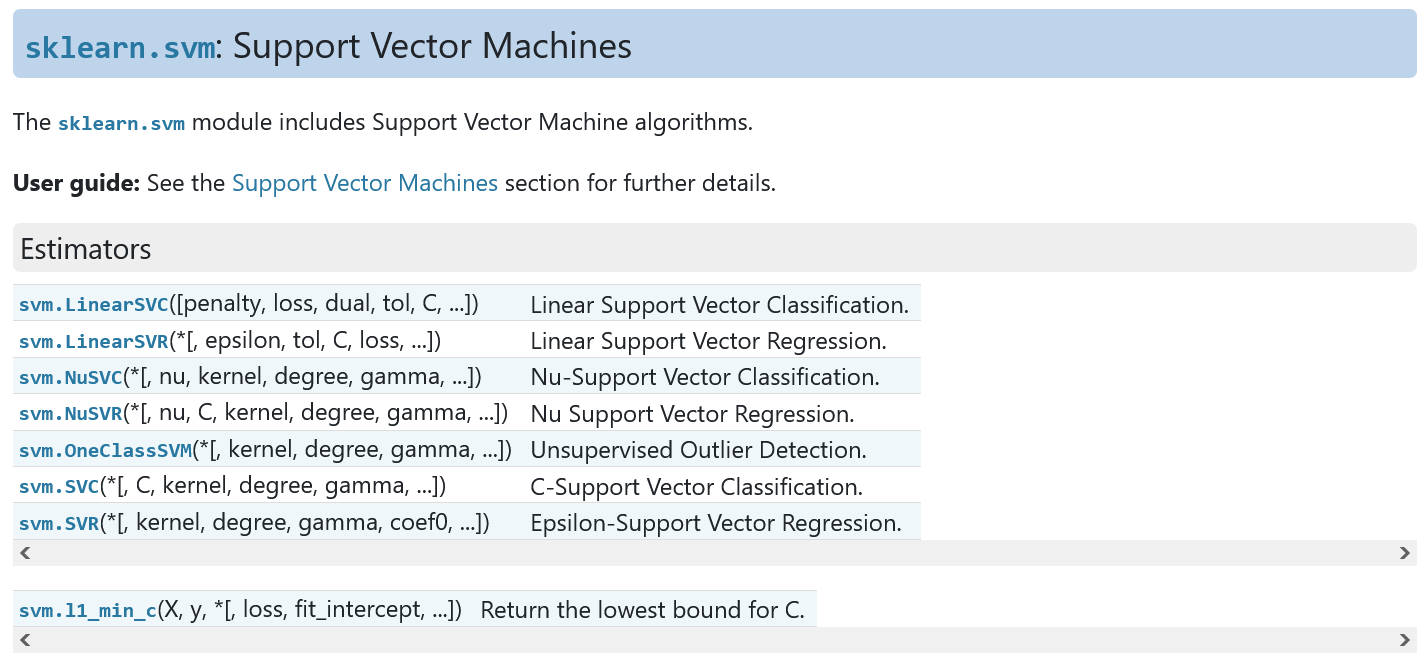

Lo que tratamos de hacer es encontrar un hiperplano que separe las clases con el mayor margen posible, donde el margen se "apoya" en puntos conocidos (vectores de soporte).

![](https://www.researchgate.net/profile/Preetam-Ghosh/publication/339906010/figure/fig3/AS:1024272256483328@1621216944077/Non-linear-support-vector-machine-Two-class-classification-input-data-is-mapped-to.png)

Hay muchos tipos de SVM, pero primero probaremos una SVM lineal, la más básica. Esto significa que el límite de decisión será lineal.

In [ ]:
# Vamos a usar C-Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix


In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


Probemos también RBF

In [ ]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


### Comparación entre clasificadores SVM

Vamos a implementar en un solo bloque una muestra de diferencias entre clasificadores SVM en una proyeccion 2D del dataset Iris. Esta es otra forma de tratar los datos Iris.

Notar que distintos SVM tienen distintos parámetros según el tipo de *kernel* que implementan: [docs de Scikit Learn sobre "Kernel functions"](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

Vamos a considerar solo los primeros 2 features del dataset:
* Sepal length
* Sepal width

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# Importamos el dataset Itis
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las 2 primeras características
y = iris.target

h = .02  # TODO: step size en el mesh

C = 0.1  # Parametro de regularización en SVM
# Creamos múltiples modelos de tipo SVM y los ajustamos a los datos.
# No escalamos los datos, ya que queremos trazar los vectores de soporte
svc_linear = svm.SVC(kernel="linear", C=C).fit(X, y)
svc_rbf = svm.SVC(kernel="rbf", gamma=0.7, C=C).fit(X, y)
svc_poly = svm.SVC(kernel="poly", degree=3, C=C).fit(X, y)
svc_lin = svm.LinearSVC(C=C).fit(X, y)
# PROPUESTO: Estudiar qué hace cada parámtro y cómo cambia la salida

# Creamos el mesh donde haremos los gráficos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Título de cada gráfico
titles = [
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
]

for i, clf in enumerate((svc_linear, svc_lin, svc_rbf, svc_poly)):
    # Dibujar el límite de decisión. Para ello, asignaremos un color a cada
    # punto en el mesh [x_min, x_max] x [y_min, y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Ponemos el resultado en un diagrama de color
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Graficamos los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, marker=".", cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


Ambos modelos lineales tienen límites de decisión lineales (hiperplanos que se cruzan), mientras que los modelos de kernel no lineales (RBF polinomiales o gaussianos) tienen límites de decisión no lineales más flexibles con formas que dependen del tipo de kernel y sus parámetros.

## (3) Árboles de decisión

* Técnica simple que funciona con cualquier tipo de dato
* Construye una estructura de árbol en base a tests sobre las características
* Rendimiento regular, pero altamente interpretable
* Se encuentra en el módulo `sklearn.tree`
* Para instanciarlo, utilizamos `model = tree.DecisionTreeClassifier()`

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png)

Algo muy interesante de los arboles de desicion es que sklearn nos entrega muchos parametros internos del algoritmo, los cuales podemos estudiar como sus ramas o el camino de desicion.

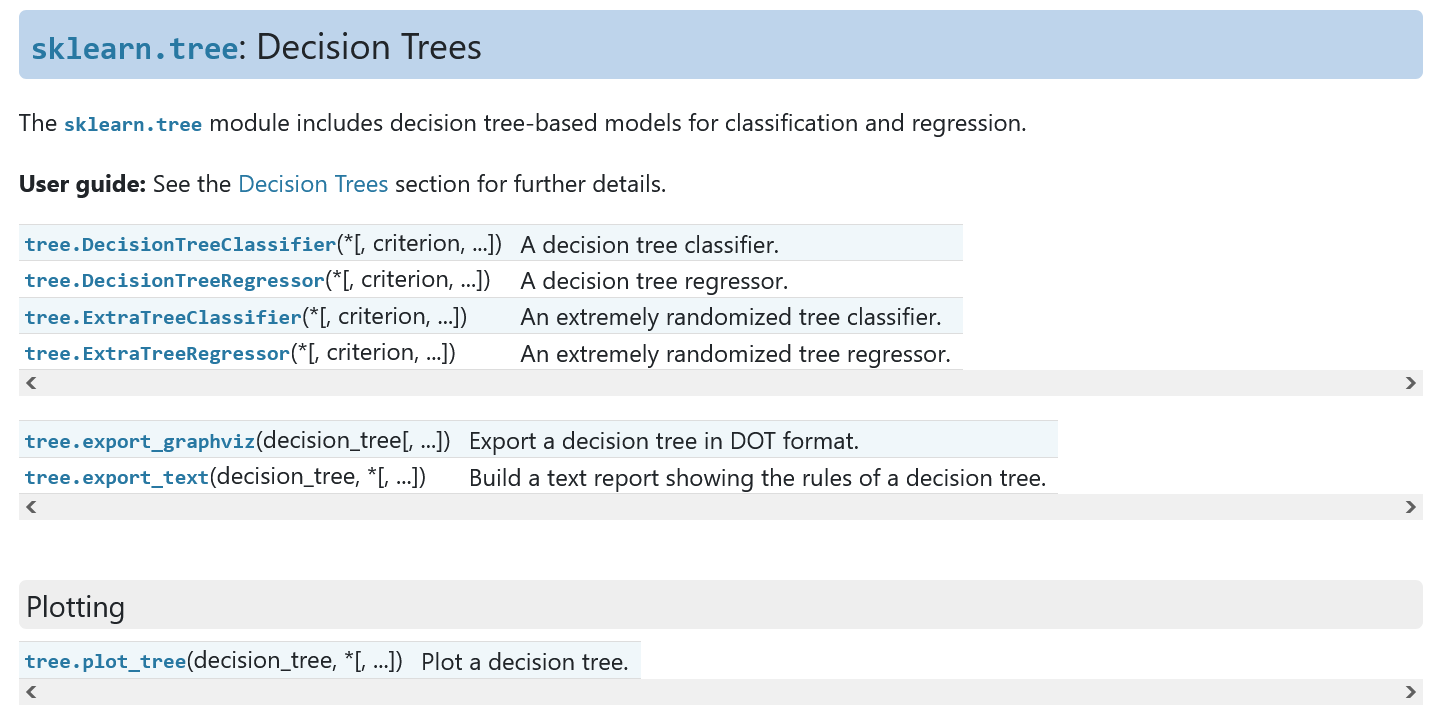

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
predicted = tree.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


In [ ]:
plt.figure()
plot_tree(tree, filled=True)
plt.title("Arbol de decisión entrenado en todas las features de Iris")
plt.show()

## (4) Ensambles

* Técnicas que combinan múltiples clasificadores (generalmente árboles) para generar una predicción
* Menor interpretabilidad que un árbol, pero obtienen rendimiento muy altos
* Se encuentran en el módulo `sklearn.ensemble`
* Para instanciarlo, usamos:
    * `model = ensemnble.RandomForestclassifier()`
    * `model = ensemble.GradientBoostingClassifier()`

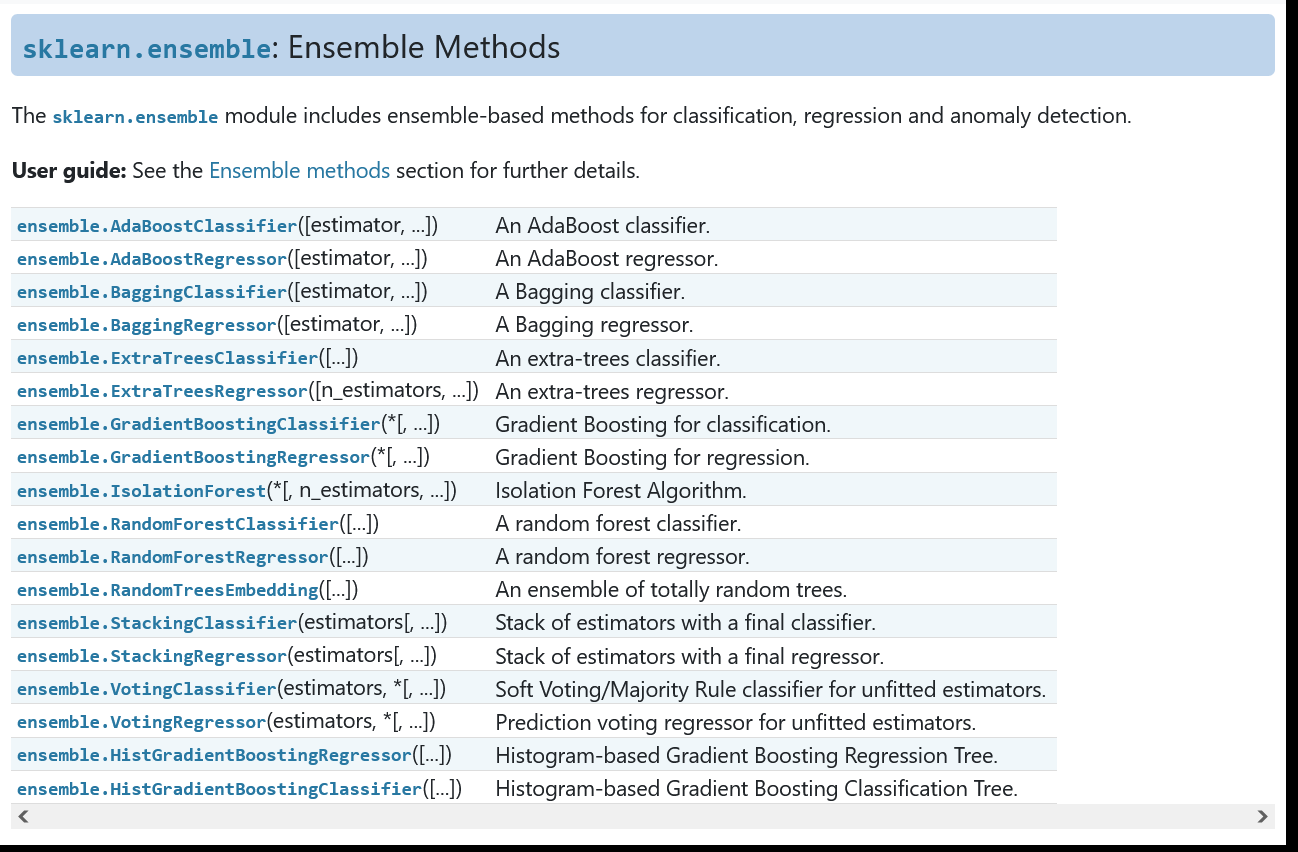

### (4.1) Random Forest

Un reandom forest es un metaestimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar el *accuracy* y controlar el sobreajuste (overfitting).

![](https://uploads-ssl.webflow.com/618cf0192088c3aff8cedbe0/63a588536d150f16f8b08e79_2.jpeg)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100) # Cantidad de árboles en el "forest"
forest.fit(X_train, y_train)
predicted = forest.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


### (4.2) Gradient Boosting

Este algoritmo construye un modelo aditivo en una forma avanzada por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. En cada etapa, se ajustan `n_classes_` árboles de regresión en el gradiente negativo de la función de pérdida.

![](https://uploads-ssl.webflow.com/618cf0192088c3aff8cedbe0/63a589023eafb5d65bf9fda0_4.jpeg)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
boost = GradientBoostingClassifier(n_estimators=100) # Cantidad de "boosting stages"
boost.fit(X_train, y_train)
predicted = boost.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


## (5) Redes Neuronales: MLP

* Técnica altamente general y compleja para estimar funciones de todo tipo
* Procesan los datos a través de varias capas, lo que les permite aprender cualquier cosa
* En la actualidad, si se tienen muchos datos, son la que mejor funcionan (junto con los ensambles)
* Se encuentran en el módulo `sklearn.neural_network`
* Para instanciarla, utilizamos `model = neural_network.MLPClassifier()`

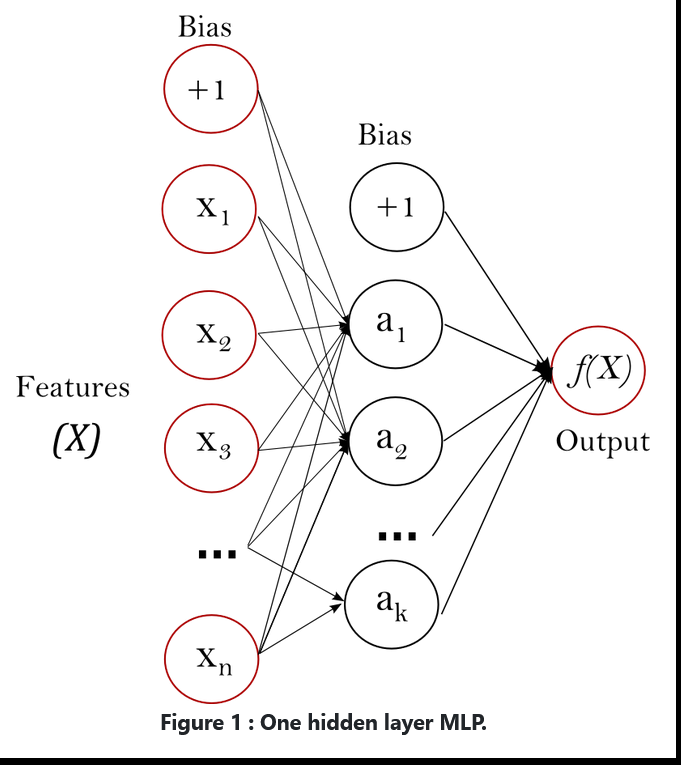

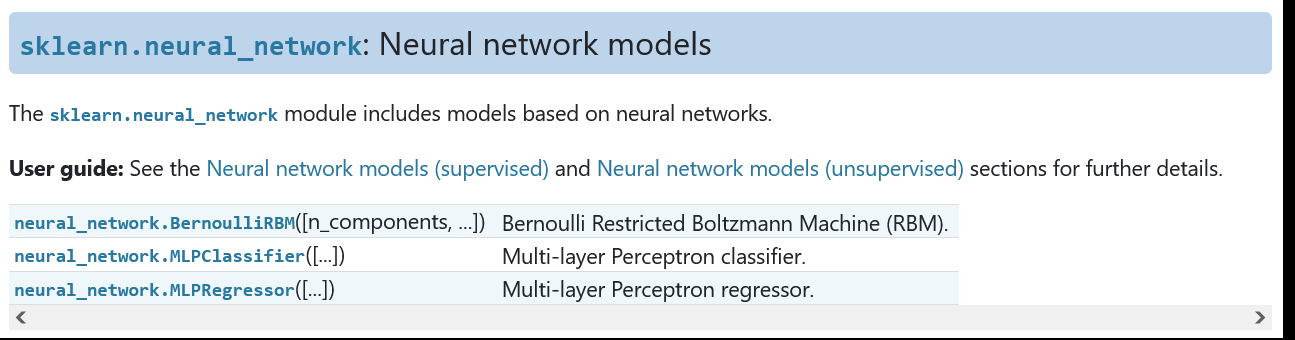

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, predicted))
print()

print("Accuracy:")
print(balanced_accuracy_score(y_test, predicted))
print()

print("Classification report:")
print(classification_report(y_test, predicted))


# Sobreajuste u *overfitting*

## Subentrenamiento (*underfitting*)

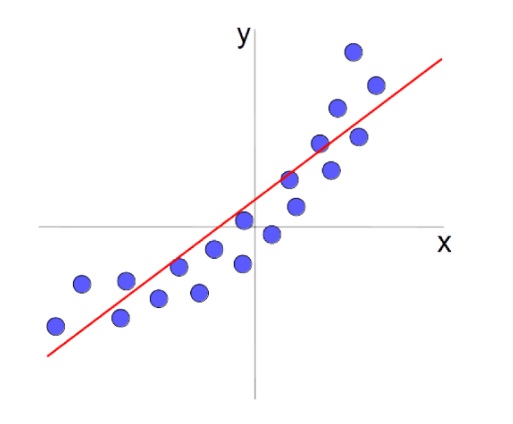

## Sobreentrenamiento (*overfitting*)

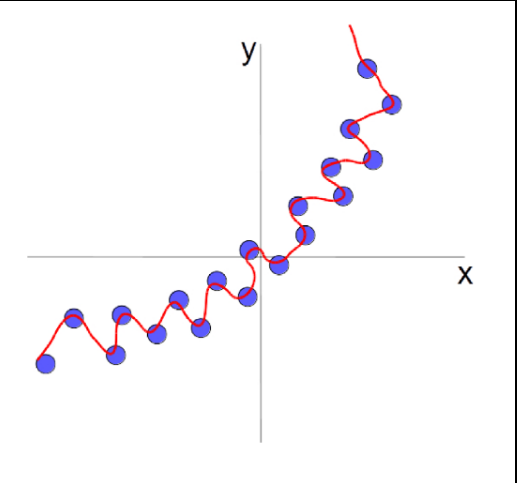

## Óptimo

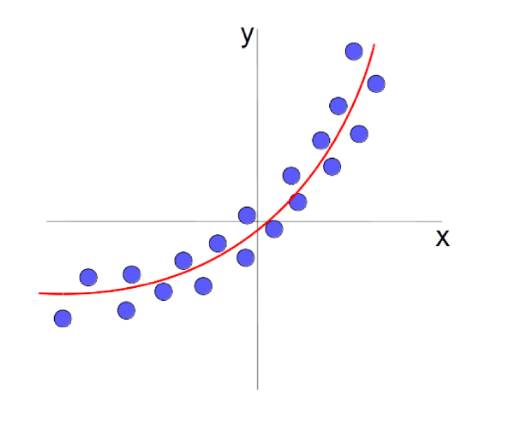

* Un mecanismo típico para acercanos al óptimo es utilizar un set de validación para evaluar el rendimiento
* El set de validación es una pequeña parte del set de entrenamiento, que no se usa para entrenar inicialmente
* Se entrenan distintos modelos en el nuevo set de entrenamiento y se evalúan en el de validación
* El set con mejor rendimiento en validación es el elegido, y se usa para entrenar el modelo con todos los datos (entrenamiento + validación)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns; sns.set()

In [ ]:
X, y = datasets.load_wine(return_X_y=True)

In [ ]:
y

In [ ]:
DecisionTreeClassifier().get_params()

In [ ]:
param_range = np.arange(1, 250, 2)

In [ ]:
profundidad = range(1, 31)
acc_entrenamiento, acc_val = validation_curve(DecisionTreeClassifier(), X, y, param_name='max_depth', param_range=profundidad, cv=5)

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams.update({'font.size': 16})
plt.plot(profundidad, np.median(acc_entrenamiento, 1), color='blue', label='accuracy entrenamiento')
plt.plot(profundidad, np.median(acc_val, 1), color='red', label='accuracy validación')
plt.legend(loc='best')
plt.ylim(0.65, 1.01)
plt.xlabel('profundidad')
plt.ylabel('accuracy')

# Error en validación

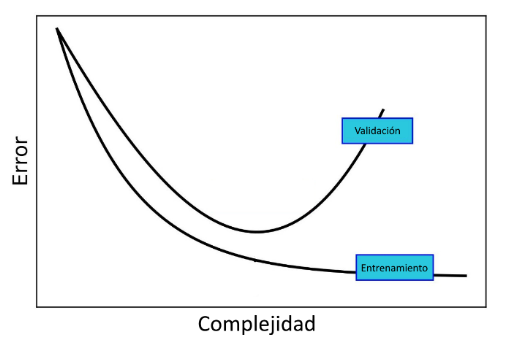